# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 2.1 Plot $y = -3x^2 + 72x + 70$.

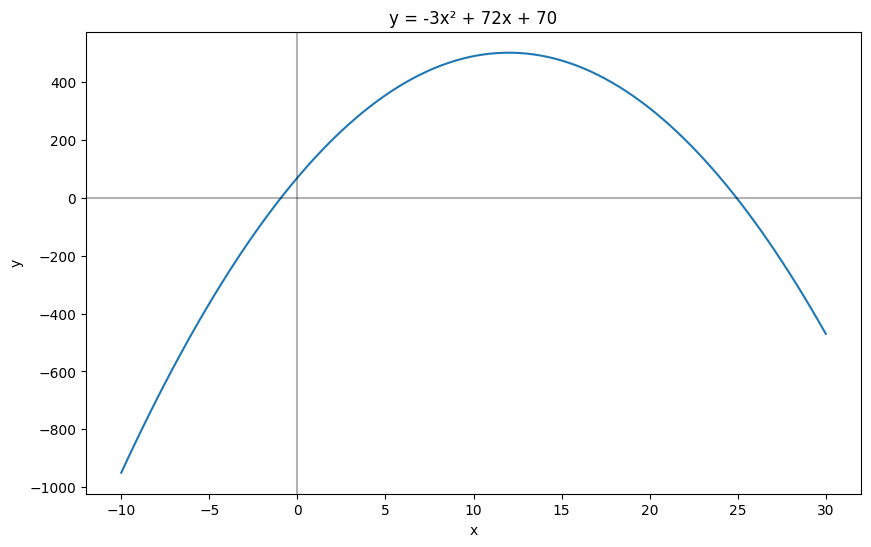

In [3]:
x = np.linspace(-10, 30, 100)
y = -3*x**2 + 72*x + 70
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('y = -3x² + 72x + 70')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

## 2.3 Plot $f(x_1, x_2)$.

Maximum height occurs at:
Water (x1) = 2.00
Sunlight (x2) = 0.97
Maximum height = 0.9991


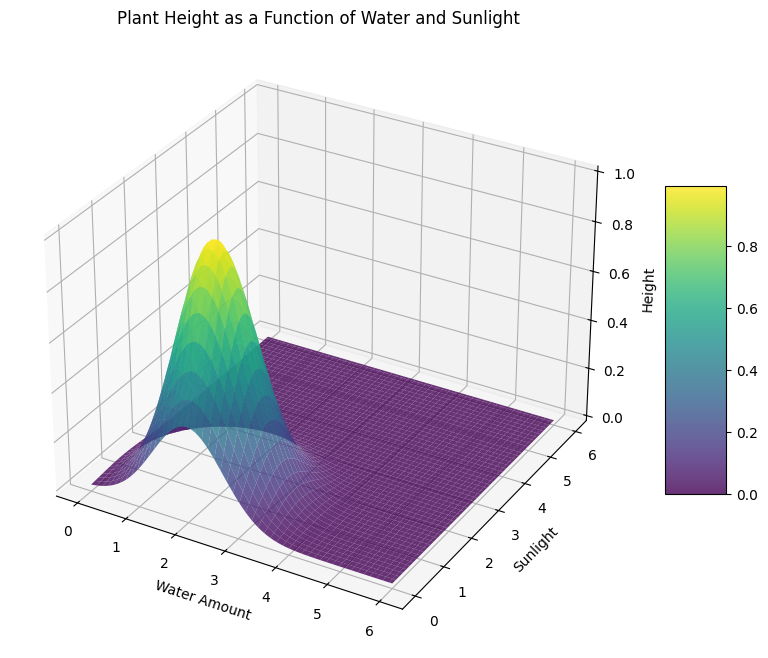

In [4]:
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 6, 100)
X1, X2 = np.meshgrid(x1, x2)

def height(x1, x2):
    return np.exp(-(x1 - 2)**2 - (x2 - 1)**2)

Y = height(X1, X2)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X1, X2, Y, cmap='viridis', alpha=0.8)
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('Water Amount')
ax.set_ylabel('Sunlight')
ax.set_zlabel('Height')
ax.set_title('Plant Height as a Function of Water and Sunlight')
i, j = np.unravel_index(np.argmax(Y), Y.shape)
max_x1 = x1[j] 
max_x2 = x2[i]
max_height = Y[i, j]

print(f"Maximum height occurs at:")
print(f"Water (x1) = {max_x1:.2f}")
print(f"Sunlight (x2) = {max_x2:.2f}")
print(f"Maximum height = {max_height:.4f}")

plt.show()

## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

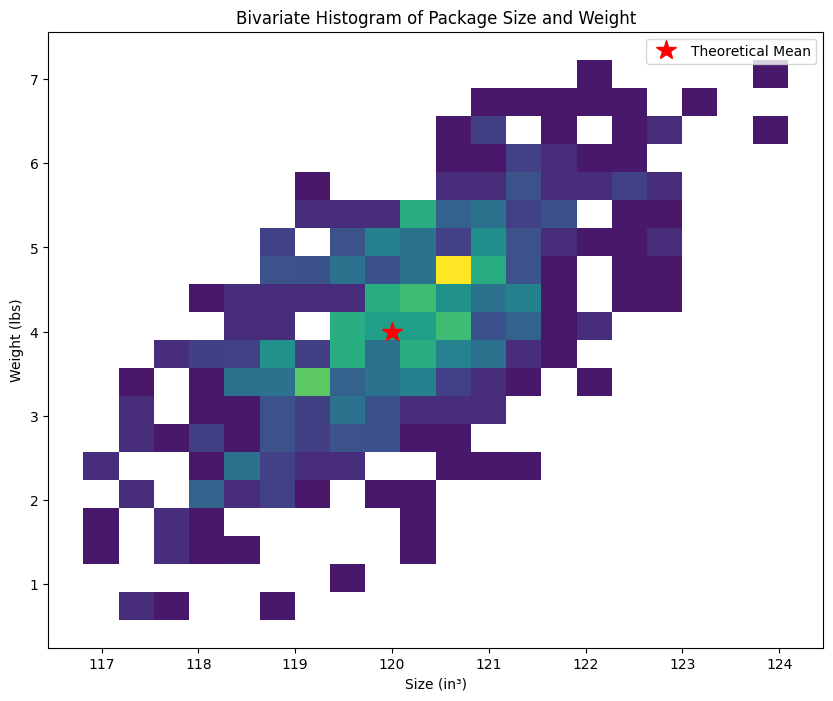

Theoretical Expected Size: 120.00 in³
Theoretical Expected Weight: 4.00 lbs

Empirical Mode (approximate):
Size: 120.63 in³
Weight: 4.74 lbs


In [17]:
from scipy.stats import multivariate_normal

np.random.seed(181)

mu = np.array([120, 4])
sigma = np.array([[1.5, 1], [1, 1.5]]) 


samples = multivariate_normal.rvs(mean=mu, cov=sigma, size=500)


plt.figure(figsize=(10, 8))
sns.histplot(
    data={'Size': samples[:, 0], 'Weight': samples[:, 1]},
    x='Size',
    y='Weight',
    bins=20,
    cmap='viridis',
    stat='density'
)


plt.plot(mu[0], mu[1], 'r*', markersize=15, label='Theoretical Mean')

plt.title('Bivariate Histogram of Package Size and Weight')
plt.xlabel('Size (in³)')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.show()


print(f"Theoretical Expected Size: {mu[0]:.2f} in³")
print(f"Theoretical Expected Weight: {mu[1]:.2f} lbs")


hist, x_edges, y_edges = np.histogram2d(samples[:, 0], samples[:, 1], bins=20)
max_idx = np.unravel_index(hist.argmax(), hist.shape)
empirical_mode_size = (x_edges[max_idx[0]] + x_edges[max_idx[0] + 1]) / 2
empirical_mode_weight = (y_edges[max_idx[1]] + y_edges[max_idx[1] + 1]) / 2

print(f"\nEmpirical Mode (approximate):")
print(f"Size: {empirical_mode_size:.2f} in³")
print(f"Weight: {empirical_mode_weight:.2f} lbs")

### 3.1b: 

These empirical valuesa re very close to the theoretical and expected size -- the weight is more off than the size interestingly.

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

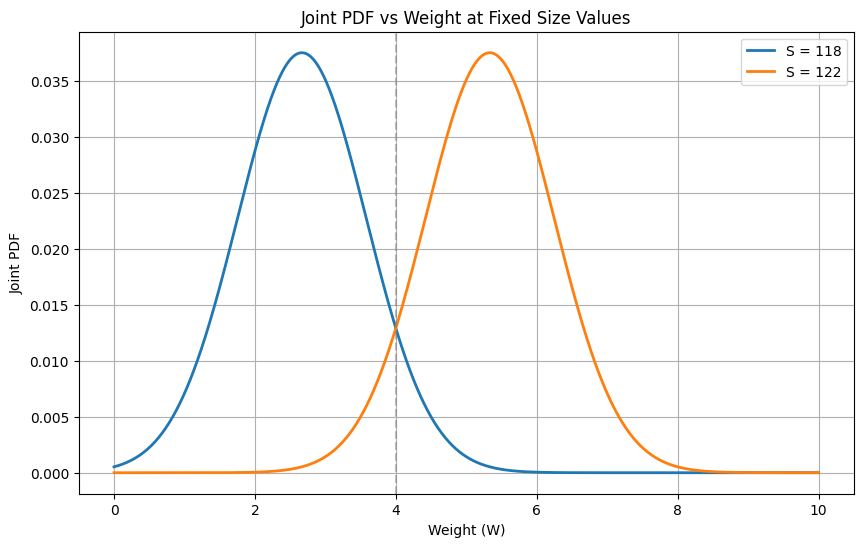

Peak W value for S=118: 2.67
Peak W value for S=122: 5.33


In [18]:
mu = np.array([120, 4])  
sigma = np.array([[1.5, 1], [1, 1.5]]) 
rv = multivariate_normal(mu, sigma)

w_vals = np.linspace(0, 10, 1001)

pdf_s118 = np.array([rv.pdf([118, w]) for w in w_vals])

pdf_s122 = np.array([rv.pdf([122, w]) for w in w_vals])

plt.figure(figsize=(10, 6))
plt.plot(w_vals, pdf_s118, label='S = 118', linewidth=2)
plt.plot(w_vals, pdf_s122, label='S = 122', linewidth=2)

plt.xlabel('Weight (W)')
plt.ylabel('Joint PDF')
plt.title('Joint PDF vs Weight at Fixed Size Values')
plt.legend()
plt.grid(True)

plt.axvline(x=mu[1], color='gray', linestyle='--', alpha=0.5, label='Mean Weight')

plt.show()

print(f"Peak W value for S=118: {w_vals[np.argmax(pdf_s118)]:.2f}")
print(f"Peak W value for S=122: {w_vals[np.argmax(pdf_s122)]:.2f}")

## 3.5(a) Function to simulate draws from $T^{*}$.

In [19]:
def simulate_total_processing_time(n_simulations=1):
    """
    Simulate draws from T* distribution (total processing time for all packages)
    
    Args:
        n_simulations: Number of T* values to simulate
        
    Returns:
        Array of simulated T* values
    """
    # Distribution parameters
    mu = np.array([120, 4])  # Mean for (S,W)
    sigma = np.array([[1.5, 1], [1, 1.5]])  # Covariance for (S,W)
    
    # Initialize array for results
    total_times = np.zeros(n_simulations)
    
    for i in range(n_simulations):
        # Generate N (sum of 24 Poisson(3) variables)
        N = np.sum(np.random.poisson(lam=3, size=24))
        
        if N > 0:  # Only proceed if there are packages
            # Generate S,W for all packages at once
            SW = multivariate_normal.rvs(mean=mu, cov=sigma, size=N)
            
            # Generate error terms
            epsilon = np.random.normal(0, np.sqrt(5), N)
            
            # Calculate processing times for all packages
            # T = 60 + 0.6W + 0.2S + ε
            times = 60 + 0.6*SW[:,1] + 0.2*SW[:,0] + epsilon
            
            # Sum to get total processing time
            total_times[i] = np.sum(times)
    
    return total_times


## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [20]:
simulated_times = simulate_total_processing_time(n_simulations=1000)

# Print summary statistics
print(f"Mean total processing time: {np.mean(simulated_times):.2f} seconds")
print(f"Std dev of total processing time: {np.std(simulated_times):.2f} seconds")

Mean total processing time: 6213.39 seconds
Std dev of total processing time: 753.67 seconds


# 4.1: Examining the Data

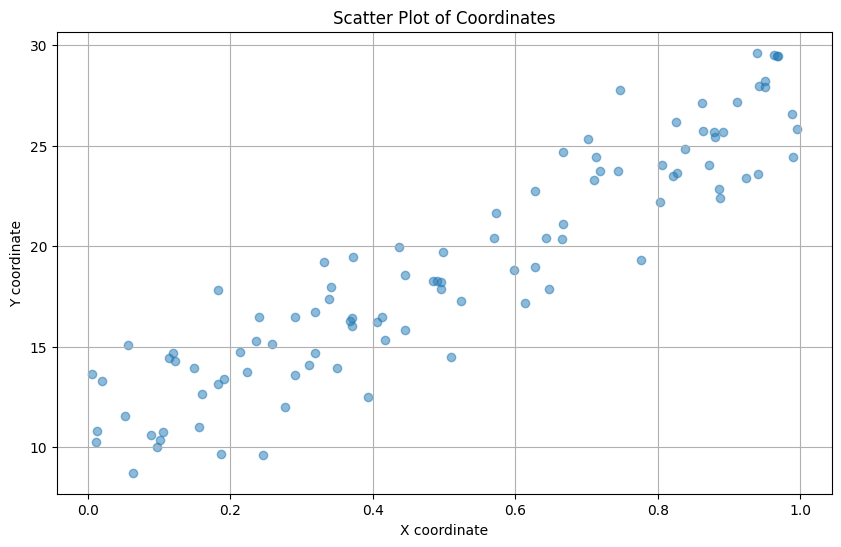


First 5 points:
Point 1: (x=0.52, y=17.25)
Point 2: (x=0.11, y=14.41)
Point 3: (x=0.57, y=20.37)
Point 4: (x=0.41, y=16.23)
Point 5: (x=0.18, y=13.12)


In [9]:
data = pd.read_csv("data/points.csv").values

# his implementation did not get the columns properly and only got one value

# proper column extraction
x = data[:, 0]  # All rows first column
y = data[:, 1]  # All rows second column

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Scatter Plot of Coordinates')
plt.grid(True)
plt.show()

print("\nFirst 5 points:")
for i in range(min(5, len(x))):
    print(f"Point {i+1}: (x={x[i]:.2f}, y={y[i]:.2f})")

### 4.1 yes there appears to be a linear trend. as x increases, Y seems to increase linearly.

## 4.2: Adding the Intercept/Bias Term

In [11]:
intercept = np.ones(x.shape[0]).reshape(-1, 1)  # make column vector
x_col = x.reshape(-1, 1)  # make x a column vector

# Horizontally stack the columns
X = np.hstack([intercept, x_col])


print("Shape y:", y.shape)
print("Shape X:", X.shape)

print(X[:3])


Shape y: (100,)
Shape X: (100, 2)
[[1.         0.52402311]
 [1.         0.11408956]
 [1.         0.57056722]]


### 4.2 

The problem is that hstack expects a 2d array, not a 1d array. reshaping makes them column vectors, which is proper for this implementation.


Y conventionally kept as a 1D array in scikit-learn style

## 4.4: Implementing the LinearRegression Class

In [12]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y  # Fixed matrix multiplication
        return self

    def predict(self, X):
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ self.w  # Fixed to use self.w and added self parameter

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mkrasnow/Desktop/HARVARD/cs-181/hw0/img_output/hw0_p4_4.png'

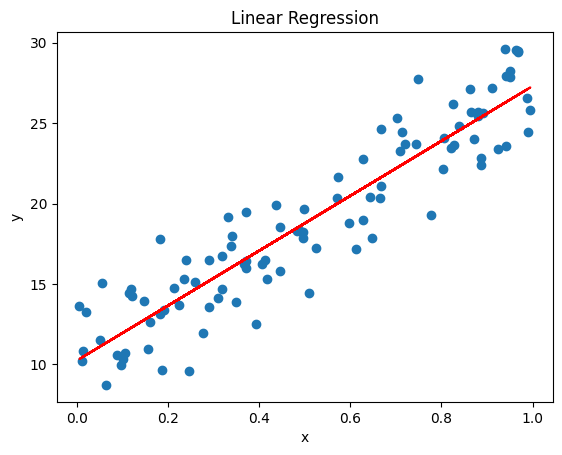

In [14]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [16]:
# Steve's solution
mse = 0
for i in range(len(y)):
    mse = mse + (y[i] - y_pred[i])**2
mse = mse / len(y)
print(mse)

4.439331220193986


Mathematically expresion: 

$MSE = \frac{1}{n} \|(y - \hat{y})\|^2 = \frac{1}{n}(y - \hat{y})^T(y - \hat{y})$

In [15]:
mse = np.mean((y - y_pred)**2)
print(mse)

4.439331220193985
